<a href="https://colab.research.google.com/github/miguelDeSaAdegas/machineLearning/blob/main/S%C3%A9ance_8_R%C3%A9seau_de_Neurones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Théorie

##Vidéos obligatoires
Nous vous demandons de regarder et de comprendre les vidéos suivantes :

1.   [BINV3100 2 IA 1 Introduction au réseau de neurones et deep-learning](https://www.youtube.com/watch?v=CNJ942E7UyQ)
2.   [BINV3100 2 IA 2 Réseau de neurones](https://www.youtube.com/watch?v=FIfByp7qc90)
3.   [BINV3100 2 IA 3 Régression sur PyTorch](https://www.youtube.com/watch?v=Fnjj2QBpUM4)
4.   [BINV3100 2 IA 3 Classification sur PyTorch](https://www.youtube.com/watch?v=cOMagXizAtk)
5.   [BINV3100 2 IA 5 Enoncé exercices](https://www.youtube.com/watch?v=Y95L3CJZ5TQ)

#Partie 1: Exercices relatifs aux Vidéos

[BINV3100 2 IA 5 Enoncé exercices](https://www.youtube.com/watch?v=Y95L3CJZ5TQ)

**Nous utilisons pas encore le GPU, il ne faut pas changer le runtime**

Merci de commenter un maximum votre code.

Objectifs :

Exercice 1 (sur 4):
- Layer ok et bons paramètres
- Bonne forward pass / calcul de loss / retropropagation du gradient
- Bonne accuracy sur le test (100% escompté)
- Divers (bonne gestion de type, bonne création de batch, bon arrêt d'entrainement, tracking de la training loss)


Exercice 2 (sur 2) :
- Bonne modification du réseau
- Bonne accuracy sur le test (100% escompté)

Exercice 3 (sur 2):
- Bonne déclaration de la classe Network
- Bonne modification de optimizer et de la forward pass

Exercice 4 (sur 2):
- Bonne déclaration de la classe Dataset
- Bon calcul de l'accuracy

Bonus (2 points):
- Exercice 4: plot de l'évolution de la training loss par epoch
- Un truc cool qui va au dela des énnoncés (merci de le dire explicitement dans cette cellule pour que je le trouve facilement)



## **Exercice 1 : Classification linéaire**

In [23]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

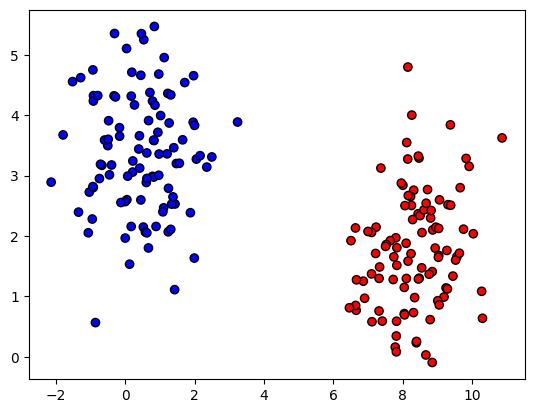

In [33]:
X, y = make_blobs(n_samples=200, centers=2, n_features=2, center_box=(0, 10))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']),
               edgecolors='k')

In [21]:
# Procédure pour générer un batch
def batch(X,y,batch_size):
  #X,y sont les features et target dont on veut prendre un batch de taille batch size
  #Attention !! X et y doivent être des array numpy et batch, batch y en seront aussi
  batch_x = []
  batch_y = []
  indices = []
  while (len(indices)<batch_size) :
    random_index = randrange(len(X))
    if (not random_index in indices):
      batch_x.append(np.array(X[random_index]))
      batch_y.append(np.array(y[random_index]))
      indices.append(random_index)
  return np.array(batch_x), np.array(batch_y)

In [34]:
from numpy.core.multiarray import dtype
import torch
import torch.nn as nn
import numpy as np
from random import randrange
import torch.optim as optim

## Créez les layers ici
layer1 = nn.Linear(2,3)
layer2 = nn.Linear(3,2)

# Déclarez les parametres de l'expérience (batch_size, learning rate, ...)
learning_rate = 0.1
batch_size = 10
# Déclarez la loss et l'optimisation (SGD)
loss_func = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(list(layer1.parameters())+list(layer2.parameters()), lr=learning_rate)

# Split test/train selon https://playground.tensorflow.org/
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)

# Procédure de training cad
while(True):
  # 1) boucle d'entrainement avec création de batch aléatoire en utilisant la fonction batch
  batch_x, batch_y = batch(X_train, y_train, batch_size)

  inputs = torch.tensor(batch_x, dtype=torch.float32)
  labels = torch.tensor(batch_y, dtype=torch.long)

  optimizer.zero_grad()
  # 2) prediction du reseau (forward pass)
  output = layer2(layer1(inputs))

  # 3) calcul de la loss
  loss = loss_func(output, labels)

  # 4) rétropropagation du gradient
  loss.backward()
  optimizer.step()
  # 5) tracking de la training loss
  print(f"Training Loss: {loss.item()}")
  # 6) Si vous avez une bonne training loss, vous utilisez break
  if loss.item() < 0.1:
        break


# Quand le modèle a convergé, on calcule l'accuracy sur le test.
# Ici, il n'est pas nécéssaire de créer des batch, on peut tout envoyer dans le réseau en une fois
# ne pas utiliser de fonction sklearn, calculez l'accuracy vous même avec np.argmax
with torch.no_grad():
    test_inputs = torch.Tensor(X_test)
    test_labels = torch.LongTensor(y_test)
    test_output1 = layer2(layer1(test_inputs))

    # Conversion des prédictions en classes
    predicted = np.argmax(test_output1.numpy(), axis=1)

    # Calcul de l'accuracy
    accuracy = np.mean(predicted == test_labels.numpy())

    print(f"Accuracy on Test Data: {accuracy*100}%")

Training Loss: 3.349078416824341
Training Loss: 0.9496923685073853
Training Loss: 0.6003400087356567
Training Loss: 0.5320217609405518
Training Loss: 0.325547993183136
Training Loss: 0.2631993293762207
Training Loss: 0.18815647065639496
Training Loss: 0.22588321566581726
Training Loss: 0.11871472746133804
Training Loss: 0.10368753969669342
Training Loss: 0.16912633180618286
Training Loss: 0.11745913326740265
Training Loss: 0.05466252565383911
Accuracy on Test Data: 100.0%


## **Exercice 2 : Classification non-linéaire**

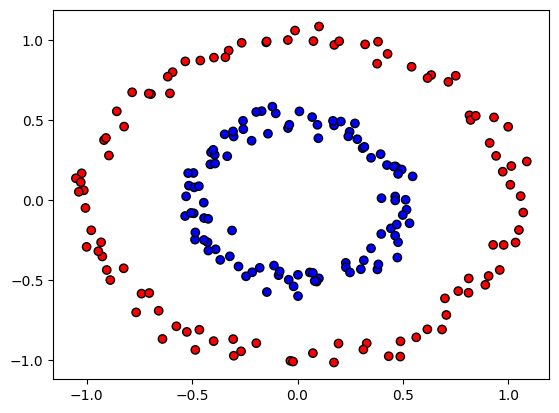

In [35]:
X, y = make_circles(n_samples=200, noise=0.05, factor=0.5, random_state=1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']),
               edgecolors='k')
plt.show()


In [36]:
# Modifiez votre reseau (la couche intermédiaire) pour obtenir 100% sur ce dataset


## Créez les layers ici
layer1 = nn.Linear(2, 4)
tanh = nn.Tanh()
layer2 = nn.Linear(4, 2)

# Déclarez les parametres de l'expérience (batch_size, learning rate, ...)

learning_rate = 0.1
split_portion = 0.5
batch_size = 10

# Déclarez la loss et l'optimisation (SGD)
loss_func = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(list(layer1.parameters())+list(layer2.parameters()), lr=learning_rate)

# Split test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_portion, random_state=4)

# Training
while(True):
  batch_x, batch_y = batch(X_train, y_train, batch_size)

  train_inputs = torch.tensor(batch_x, dtype=torch.float32)
  train_labels = torch.tensor(batch_y, dtype=torch.long)

# 2) prediction du reseau (forward pass)
  optimizer.zero_grad()
  out = layer2(tanh(layer1(train_inputs)))

# 3) calcul de la loss
  loss = loss_func(out, train_labels)

# 4) rétropropagation du gradient
  loss.backward()
  optimizer.step()

# 5) tracking de la training loss
  print(f'Loss: {loss.item()}')

# 6) Si vous avez une bonne training loss, vous utilisez break
  if loss.item() < 0.1:
      break

# Eval sur test
with torch.no_grad():
  test_inputs = torch.tensor(X_test, dtype=torch.float32)
  test_labels = torch.tensor(y_test, dtype=torch.long)
  test_output = layer2(tanh(layer1(test_inputs)))

  predicted_labels = np.argmax(test_output.numpy(), axis=1)
  accuracy = np.mean(predicted_labels == test_labels.numpy())

  print(f'Model Accuracy on Test Set: {accuracy * 100}%')

Loss: 0.7010766863822937
Loss: 0.6962420344352722
Loss: 0.6930981874465942
Loss: 0.7010819315910339
Loss: 0.6835076212882996
Loss: 0.7037554979324341
Loss: 0.6942364573478699
Loss: 0.6914753913879395
Loss: 0.7010602951049805
Loss: 0.6921518445014954
Loss: 0.6792428493499756
Loss: 0.6926495432853699
Loss: 0.6792481541633606
Loss: 0.7184417843818665
Loss: 0.6782501935958862
Loss: 0.6727596521377563
Loss: 0.683358907699585
Loss: 0.696597695350647
Loss: 0.6608433723449707
Loss: 0.7111607789993286
Loss: 0.6790133714675903
Loss: 0.6370471715927124
Loss: 0.682960569858551
Loss: 0.6503311395645142
Loss: 0.7437390089035034
Loss: 0.7028056383132935
Loss: 0.7206329703330994
Loss: 0.7017885446548462
Loss: 0.6808993220329285
Loss: 0.6697567701339722
Loss: 0.6488074660301208
Loss: 0.7031440138816833
Loss: 0.6881526708602905
Loss: 0.6625833511352539
Loss: 0.6910141706466675
Loss: 0.7241583466529846
Loss: 0.6845000386238098
Loss: 0.6778233051300049
Loss: 0.667373538017273
Loss: 0.6471230983734131
Loss

## **Exercice 3 : Network class**

Vous allez recoder l'exercice 2 en ajoutant deux modifications: <br/>
1)
Pour l'instant, on traite nos couches séparément, et non comme un "block" unifié. Par exemple, il faut donner les parametres de chaque couche a l'optimizer (par exemple : `optim.SGD(list(layer1.parameters())+list(layer2.parameters()), lr=learning_rate`)

Allez sur ce lien et regardez comment définir une classe pour votre réseau (https://pytorch.org/tutorials/beginner/examples_nn/two_layer_net_module.html). Utilisez la et modifiez votre ligne de l'optimiseur ainsi que la gestion de votre forward pass.

2)
Imaginez qu'on ait 1000 couches, ce n'est pas pratique des les appeler une par une lors de la forward pass. Utilisez la fonction suivante pour palier au problème :
https://pytorch.org/docs/stable/generated/torch.nn.ModuleList.html

In [ ]:
X, y = make_circles(n_samples=200, noise=0.05, factor=0.5, random_state=1)

# Classe Network

# Copiez collez votre solution en modifiant l'otim.SGD et la forward pass



## **Exercice 4 : Dataloader**

En général, il est compliqué de créer soi même ses batchs, surtout si le dataset devient complexe. Nous allons utiliser un dataloader de pytorch, qui lui même crée les batch. Lisez **seulement la section "dataset" de cette ressource** :https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel#dataset et créer votre classe dataset. Voici une esquisse de code pour vous aider :

In [ ]:
import torch

X, y = make_circles(n_samples=200, noise=0.05, factor=0.5, random_state=1)

class Dataset(torch.utils.data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, X, y):
        # a completer

  def __len__(self):
        'Denotes the total number of samples'
        return # a completer

  def __getitem__(self, index):
        'Generates one sample of data'
        # Select one sample at position index
        # Return in type : np.array

        # a compléter
        return x, y


X_train, X_test, y_train, y_test = # splitting a faire
train_dataset = Dataset(X_train, y_train)
test_dataset = Dataset(X_test, y_test)

training_generator = torch.utils.data.DataLoader(train_dataset, batch_size=10, shuffle=True)
test_generator = torch.utils.data.DataLoader(test_dataset, batch_size=10, shuffle=False)

print('Train set length', len(train_dataset))
print('Test set length', len(test_dataset))

net = Network()

# Déclarez les parametres de l'expérience (batch_size, learning rate, ...)
# Déclarez la loss et l'optimisation (SGD)



for i in range(num_epochs):
  for j, sample in enumerate(training_generator):
    x, y = sample # Generator automatically transform it to tensor
    # A compléter


accuracy = []
for j, sample in enumerate(test_generator):
  x, y = sample # Generator automatically transform it to tensor
  # A compléter

print('\n Accuracy is ' , # A compléter)
